<a href="https://colab.research.google.com/github/techie505/trader-behavior-insights/blob/main/Trader_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()


Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [17]:
import pandas as pd

# Load data
trader_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

# Clean column names
trader_df.columns = trader_df.columns.str.strip()
sentiment_df.columns = sentiment_df.columns.str.strip()

# Convert timestamps
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])
trader_df['date'] = trader_df['Timestamp'].dt.date

sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Merge on 'date' column
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')

# Preview merged data
merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification


In [21]:
import pandas as pd

# Load the data
trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

# Convert 'Timestamp IST' to datetime in trader data
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
trader_df.dropna(subset=['Timestamp'], inplace=True)
trader_df['Trade_Date'] = trader_df['Timestamp'].dt.date

# Convert sentiment timestamp (UNIX) to datetime
if sentiment_df['timestamp'].max() > 1e12:
    sentiment_df['timestamp'] = sentiment_df['timestamp'] / 1000

sentiment_df['Datetime'] = pd.to_datetime(sentiment_df['timestamp'], unit='s', errors='coerce')
sentiment_df.dropna(subset=['Datetime'], inplace=True)
sentiment_df['Trade_Date'] = sentiment_df['Datetime'].dt.date

# Keeping only relevant sentiment columns
sentiment_clean = sentiment_df[['Trade_Date', 'classification', 'value']].drop_duplicates()

#  Merge Datasets on Trade_Date
merged_df = pd.merge(trader_df, sentiment_clean, on='Trade_Date', how='inner')

# Save merged data
merged_df.to_csv('merged_trader_sentiment.csv', index=False)

# Quick preview
print("✅ Merge successful. Final shape:", merged_df.shape)
print(merged_df[['Account', 'Coin', 'Timestamp', 'Trade_Date', 'classification', 'value']].head())



✅ Merge successful. Final shape: (35864, 19)
                                      Account  Coin           Timestamp  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107 2024-02-12 22:50:00   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107 2024-02-12 22:50:00   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107 2024-02-12 22:50:00   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107 2024-02-12 22:50:00   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107 2024-02-12 22:50:00   

   Trade_Date classification  value  
0  2024-02-12          Greed     70  
1  2024-02-12          Greed     70  
2  2024-02-12          Greed     70  
3  2024-02-12          Greed     70  
4  2024-02-12          Greed     70  


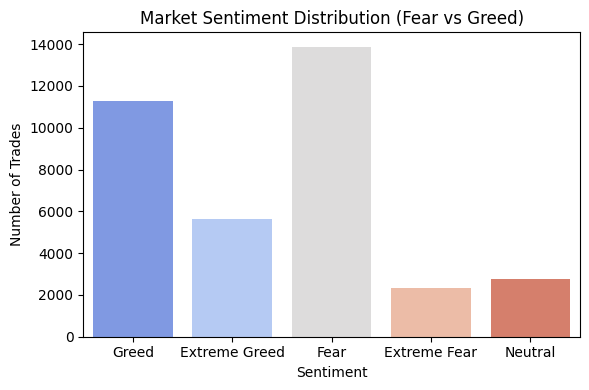

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corrected countplot with `hue` and `legend=False`
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='classification', hue='classification', palette='coolwarm', legend=False)
plt.title("Market Sentiment Distribution (Fear vs Greed)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.show()


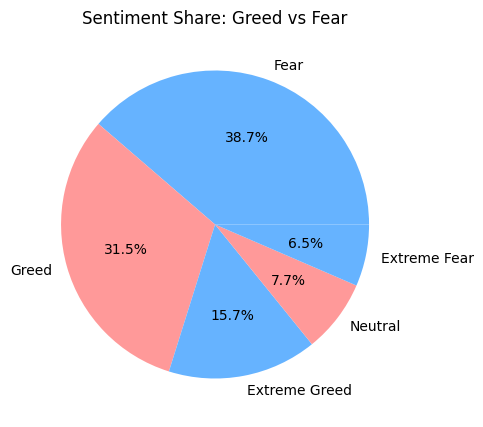

In [24]:
# Pie chart
sentiment_counts = merged_df['classification'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title("Sentiment Share: Greed vs Fear")
plt.show()


In [25]:
print("Sentiment Counts:")
print(merged_df['classification'].value_counts())



Sentiment Counts:
classification
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64


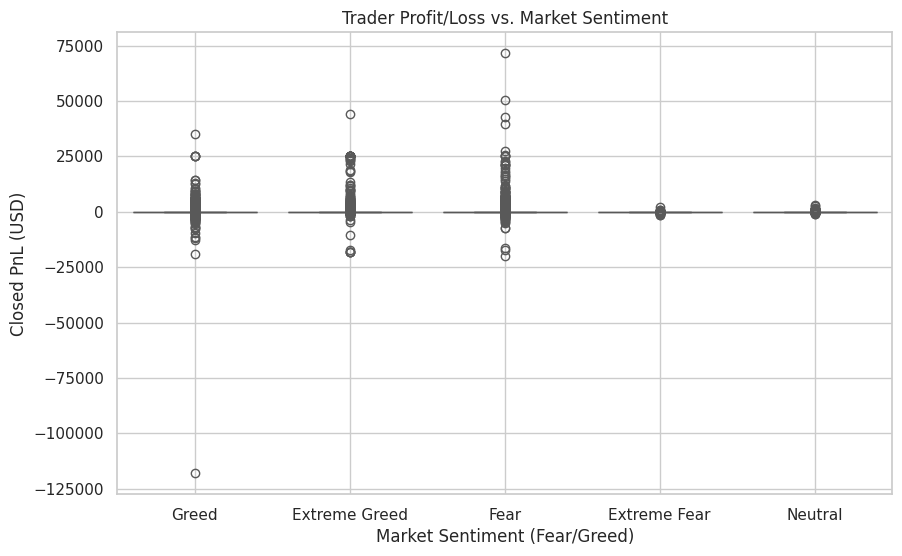

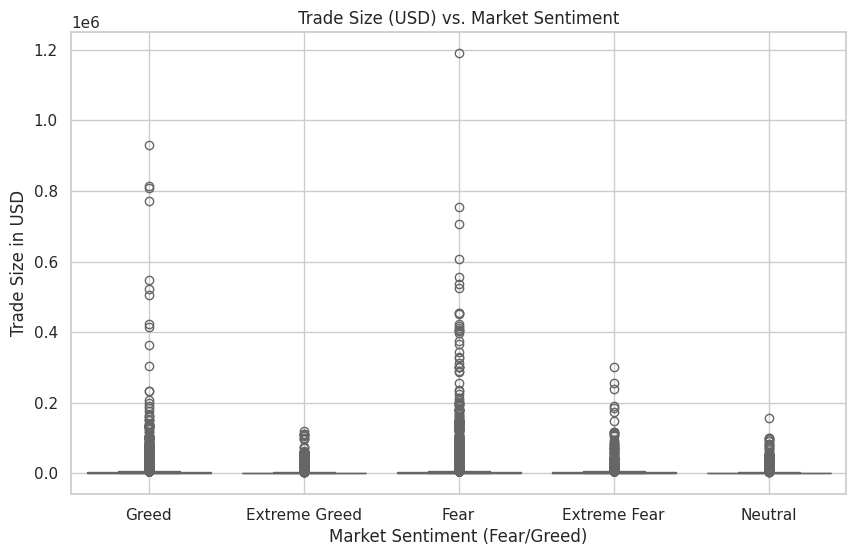

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Boxplot: Closed PnL vs Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL', hue='classification', palette='Set2', legend=False)
plt.title('Trader Profit/Loss vs. Market Sentiment')
plt.xlabel('Market Sentiment (Fear/Greed)')
plt.ylabel('Closed PnL (USD)')
plt.grid(True)
plt.show()

# Boxplot: Trade Size (USD) vs Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='classification', y='Size USD', hue='classification', palette='Set3', legend=False)
plt.title('Trade Size (USD) vs. Market Sentiment')
plt.xlabel('Market Sentiment (Fear/Greed)')
plt.ylabel('Trade Size in USD')
plt.grid(True)
plt.show()


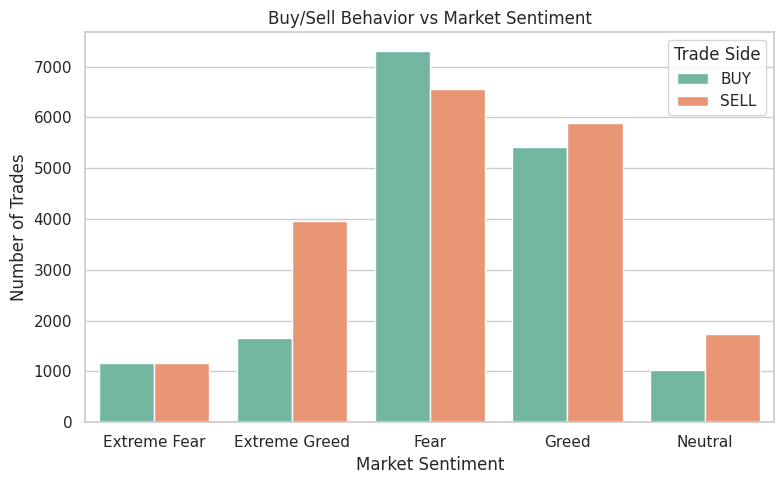


Buy/Sell Trade Counts by Sentiment:
  classification  Side  count
0   Extreme Fear   BUY   1168
1   Extreme Fear  SELL   1158
2  Extreme Greed   BUY   1661
3  Extreme Greed  SELL   3960
4           Fear   BUY   7307
5           Fear  SELL   6562
6          Greed   BUY   5407
7          Greed  SELL   5885
8        Neutral   BUY   1020
9        Neutral  SELL   1736


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of Buy/Sell under each sentiment
side_sentiment_counts = merged_df.groupby(['classification', 'Side']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=side_sentiment_counts, x='classification', y='count', hue='Side', palette='Set2')
plt.title('Buy/Sell Behavior vs Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.legend(title='Trade Side')
plt.tight_layout()
plt.show()
print("\nBuy/Sell Trade Counts by Sentiment:")
print(side_sentiment_counts)


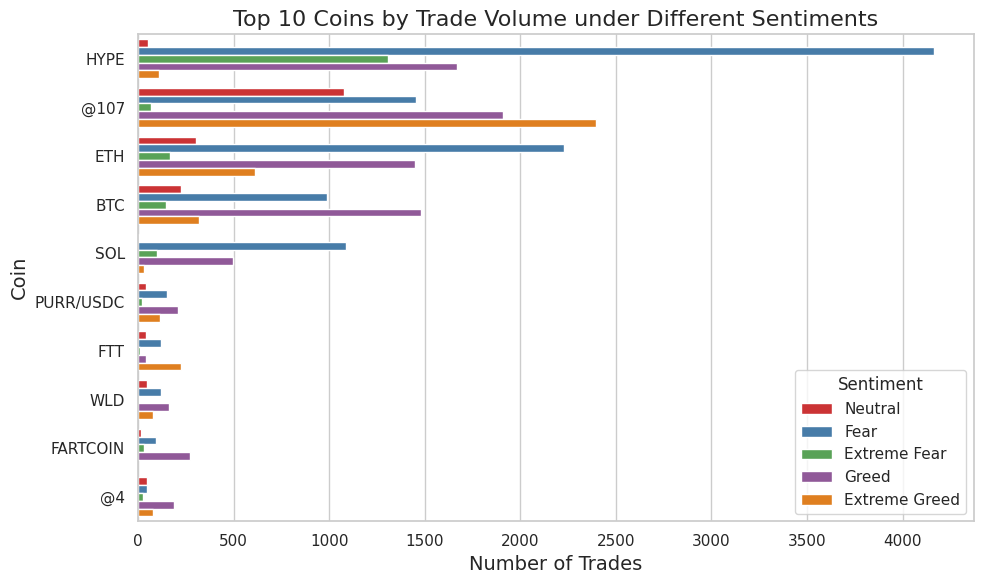

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine top-10 coins by total trades
top_coins = merged_df['Coin'].value_counts().nlargest(10).index

# Filter dataset
df_top = merged_df[merged_df['Coin'].isin(top_coins)]

# defining a consistent sentiment order
sentiment_order = ['Neutral', 'Fear', 'Extreme Fear', 'Greed', 'Extreme Greed']

# Plot horizontal countplot
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_top,
    y='Coin',
    hue='classification',
    order=top_coins,
    hue_order=sentiment_order,
    palette='Set1'
)

# Polish styling
plt.title('Top 10 Coins by Trade Volume under Different Sentiments', fontsize=16)
plt.xlabel('Number of Trades', fontsize=14)
plt.ylabel('Coin', fontsize=14)
plt.legend(title='Sentiment', title_fontsize=12, fontsize=11, loc='lower right')
plt.tight_layout()

plt.show()


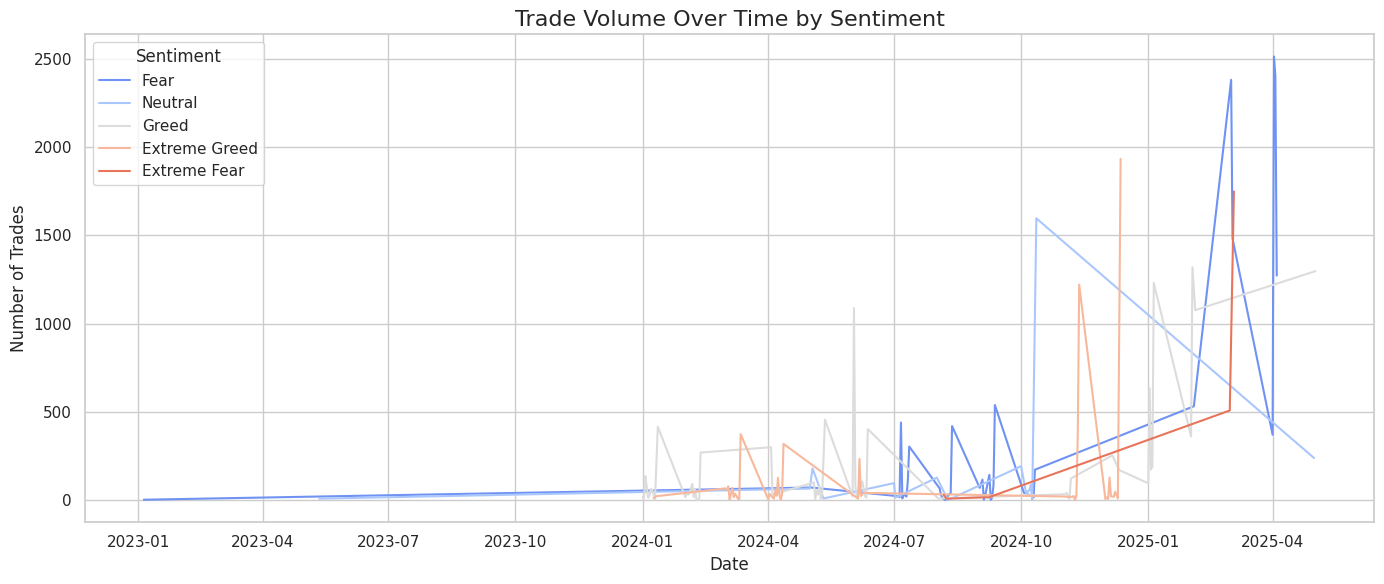

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Trade_Date' is datetime
merged_df['Trade_Date'] = pd.to_datetime(merged_df['Trade_Date'])

# Group by date and sentiment
daily_sentiment_volume = merged_df.groupby(['Trade_Date', 'classification']).size().reset_index(name='Trade_Count')

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sentiment_volume, x='Trade_Date', y='Trade_Count', hue='classification', palette='coolwarm')

plt.title('Trade Volume Over Time by Sentiment', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


/tmp/ipython-input-48-1172596857.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


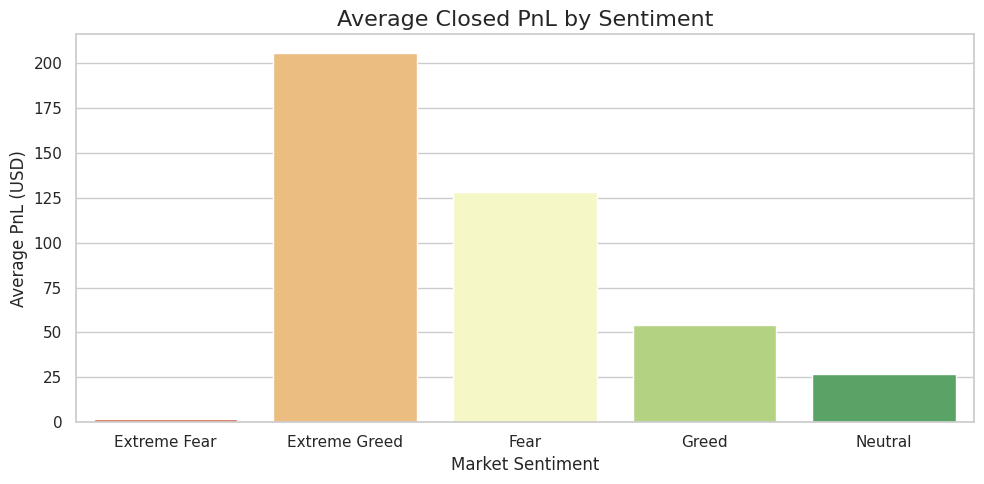

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot with explicit color assignment
colors = sns.color_palette('RdYlGn', len(pnl_by_sentiment))

plt.figure(figsize=(10, 5))
sns.barplot(
    data=pnl_by_sentiment,
    x='classification',
    y='Closed PnL',
    palette=dict(zip(pnl_by_sentiment['classification'], colors))
)

plt.title('Average Closed PnL by Sentiment', fontsize=16)
plt.xlabel('Market Sentiment')
plt.ylabel('Average PnL (USD)')
plt.tight_layout()
plt.show()


In [71]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Pearson correlation (linear)
pearson_corr, pearson_p = pearsonr(merged_df['value'], merged_df['Closed PnL'])
print(f"Pearson r = {pearson_corr:.3f}, p-value = {pearson_p:.3g}")

# Spearman correlation (rank)
spearman_corr, spearman_p = spearmanr(merged_df['value'], merged_df['Closed PnL'])
print(f"Spearman ρ = {spearman_corr:.3f}, p-value = {spearman_p:.3g}")

from scipy.stats import ttest_ind

# Group fear vs. greed
fear_pnl = merged_df.loc[merged_df['classification'].isin(['Fear', 'Extreme Fear']), 'Closed PnL']
greed_pnl = merged_df.loc[merged_df['classification'].isin(['Greed', 'Extreme Greed']), 'Closed PnL']

# Welch’s t-test (unequal variances)
t_stat, p_val = ttest_ind(fear_pnl, greed_pnl, equal_var=False)
print(f"t = {t_stat:.3f}, p-value = {p_val:.3g}")
print(f"Mean PnL on Fear days   = {fear_pnl.mean():.2f}")
print(f"Mean PnL on Greed days  = {greed_pnl.mean():.2f}")


Pearson r = 0.011, p-value = 0.0372
Spearman ρ = 0.126, p-value = 1.63e-126
t = 0.366, p-value = 0.714
Mean PnL on Fear days   = 110.13
Mean PnL on Greed days  = 104.45


In [74]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#  Loading
trader_df    = pd.read_csv('historical_data.csv').copy()
sentiment_df = pd.read_csv('fear_greed_index.csv').copy()

# Parse timestamps → Trade_Date
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')
trader_df = trader_df.dropna(subset=['Timestamp']).copy()
trader_df['Trade_Date'] = pd.to_datetime(trader_df['Timestamp'].dt.date)

if sentiment_df['timestamp'].max() > 1e12:
    sentiment_df['timestamp'] /= 1000
sentiment_df['Datetime'] = pd.to_datetime(sentiment_df['timestamp'], unit='s', errors='coerce')
sentiment_df = sentiment_df.dropna(subset=['Datetime']).copy()
sentiment_df['Trade_Date'] = pd.to_datetime(sentiment_df['Datetime'].dt.date)

sentiment_clean = sentiment_df[['Trade_Date','classification','value']].drop_duplicates()
merged_df = pd.merge(trader_df, sentiment_clean, on='Trade_Date', how='inner')
merged_df['Trade_Date'] = pd.to_datetime(merged_df['Trade_Date'])

# AUTO-DETECT COLUMNS
price_col    = [c for c in merged_df.columns if 'price' in c.lower()][0]
asset_col    = [c for c in merged_df.columns if c.lower() in ('symbol','coin')][0]
pnl_col      = [c for c in merged_df.columns if 'pnl' in c.lower()][0]
size_col     = [c for c in merged_df.columns if 'size' in c.lower()][0]
lev_cols     = [c for c in merged_df.columns if 'lever' in c.lower()]
leverage_col = lev_cols[0] if lev_cols else None

print(f"Columns ➜ price={price_col}, asset={asset_col}, pnl={pnl_col}, size={size_col}, leverage={leverage_col}")

# DAILY VOLATILITY (ensure Trade_Date is datetime on both)
vol = (
    merged_df
    .groupby([asset_col, 'Trade_Date'])[price_col]
    .std()
    .reset_index(name='daily_vol')
)
vol['Trade_Date'] = pd.to_datetime(vol['Trade_Date'])
merged_df = merged_df.merge(vol, on=[asset_col,'Trade_Date'], how='left')

# LEVERAGE BUCKETS & PLOT
if leverage_col:
    merged_df['lev_bucket'] = pd.qcut(
        merged_df[leverage_col].fillna(0),
        q=4,
        labels=['Low','Med','High','X-High']
    )
    plt.figure(figsize=(10,6))
    sns.boxplot(data=merged_df, x='lev_bucket', y=pnl_col, hue='classification', palette='Set2')
    plt.title('PnL by Leverage Tier & Sentiment')
    plt.show()

# TRADER METRICS & CLEANUP
agg = {pnl_col:'mean', size_col:'mean', 'value':'mean'}
if leverage_col:
    agg[leverage_col] = 'mean'

acct_metrics = (
    merged_df
    .groupby('Account')
    .agg(agg)
    .rename(columns={
        pnl_col:'avg_pnl',
        size_col:'avg_size',
        'value':'avg_sentiment',
        leverage_col:'avg_leverage' if leverage_col else None
    })
    .drop(columns=[None], errors='ignore')
)

cluster_feats = ['avg_pnl','avg_size','avg_sentiment'] + (['avg_leverage'] if leverage_col else [])
acct_metrics = acct_metrics.replace([np.inf, -np.inf], np.nan).dropna(subset=cluster_feats)
for col in cluster_feats:
    cap = acct_metrics[col].quantile(0.99)
    acct_metrics[col] = np.where(acct_metrics[col] > cap, cap, acct_metrics[col])

#  DYNAMIC KMEANS
n_acc = len(acct_metrics); k = min(3, n_acc)
if k >= 2:
    km = KMeans(n_clusters=k, random_state=42)
    acct_metrics['cluster'] = km.fit_predict(acct_metrics[cluster_feats])
    print(f"KMeans ({k} clusters) centroids:\n", pd.DataFrame(km.cluster_centers_, columns=cluster_feats))
else:
    print(f"Skipping clustering—only {n_acc} account(s) available")

#  PROFITABILITY CLASSIFIER
merged_df['profitable'] = (merged_df[pnl_col] > 0).astype(int)
features = ['value','daily_vol', size_col] + ([leverage_col] if leverage_col else [])
X, y = merged_df[features].fillna(0), merged_df['profitable']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
preds = rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, preds))
print("\nFeature importances:")
print(pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False))

# LAGGED SENTIMENT→PnL CHECK
merged_df = merged_df.sort_values('Trade_Date').copy()
merged_df['sentiment_prev'] = merged_df['value'].shift(1)
lag_df = merged_df.dropna(subset=['sentiment_prev'])
r_lag, p_lag = pearsonr(lag_df['sentiment_prev'], lag_df[pnl_col])
print(f"\nLagged sentiment→PnL: r = {r_lag:.3f}, p = {p_lag:.3g}")


Columns ➜ price=Execution Price, asset=Coin, pnl=Closed PnL, size=Size Tokens, leverage=None
KMeans (3 clusters) centroids:
      avg_pnl      avg_size  avg_sentiment
0  85.003822   1979.753894      49.319802
1  61.671150  93044.745670      54.842993
2  59.180507  60069.553269      64.318705

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      6149
           1       0.72      0.69      0.70      4611

    accuracy                           0.75     10760
   macro avg       0.75      0.74      0.74     10760
weighted avg       0.75      0.75      0.75     10760


Feature importances:
Size Tokens    0.587971
daily_vol      0.276855
value          0.135174
dtype: float64

Lagged sentiment→PnL: r = 0.011, p = 0.0382


In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Feature engineering
df = merged_df.copy()
df['hour'] = df['Timestamp'].dt.hour
df['dow'] = df['Timestamp'].dt.weekday

# Rolling vol/mom per coin
df = df.sort_values(['Coin','Timestamp'])
df['vol_3d'] = df.groupby('Coin')['Execution Price'].transform(
    lambda x: x.pct_change().rolling(3).std())
df['mom_3d'] = df.groupby('Coin')['Execution Price'].transform(
    lambda x: x.pct_change().rolling(3).mean())

# Account-day metrics
acct_day = df.groupby(['Account','Trade_Date']).agg(
    trades_per_day=('Closed PnL','count'),
    avg_pnl_day   =('Closed PnL','mean'),
    vol_day       =('Size Tokens','sum')
).reset_index()
df = df.merge(acct_day, on=['Account','Trade_Date'], how='left')

# One-hot sentiment
df = pd.get_dummies(df, columns=['classification'], prefix='sent')

# Prepare features & target
numeric_feats = ['value','daily_vol','Size Tokens','vol_3d','mom_3d',
                 'trades_per_day','avg_pnl_day','vol_day']
categorical_feats = ['hour','dow']
sentiment_feats = [c for c in df.columns if c.startswith('sent_')]

X = df[numeric_feats + categorical_feats + sentiment_feats].fillna(0)
y = (df['Closed PnL'] > 0).astype(int)

# Build pipeline without deprecated params
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_feats),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_feats)
], remainder='passthrough')

pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', XGBClassifier(
        tree_method='hist',
        eval_metric='auc',
        n_estimators=200,
        max_depth=5,
        learning_rate=0.05
    ))
])

# Cross-validated AUC
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')
print("5-fold CV AUC scores:", cv_scores, "Mean AUC:", cv_scores.mean())

# Train/test evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))

# Feature importances
ohe = pipeline.named_steps['pre'].named_transformers_['cat']
hour_dow_names = ohe.get_feature_names_out(categorical_feats)
all_feats = numeric_feats + list(hour_dow_names) + sentiment_feats

importances = pipeline.named_steps['clf'].feature_importances_
feat_imp = pd.Series(importances, index=all_feats).sort_values(ascending=False)
print("\nTop 10 Feature Importances:")
print(feat_imp.head(10))


5-fold CV AUC scores: [0.63008949 0.67066166 0.71532689 0.73017956 0.68889294] Mean AUC: 0.6870301079020624

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      4099
           1       0.84      0.75      0.79      3074

    accuracy                           0.83      7173
   macro avg       0.83      0.82      0.83      7173
weighted avg       0.83      0.83      0.83      7173


Top 10 Feature Importances:
avg_pnl_day    0.079015
hour_10        0.057714
hour_11        0.056199
hour_19        0.046603
hour_9         0.044250
hour_16        0.037244
hour_5         0.036185
dow_1          0.033661
hour_18        0.032259
hour_8         0.031030
dtype: float32


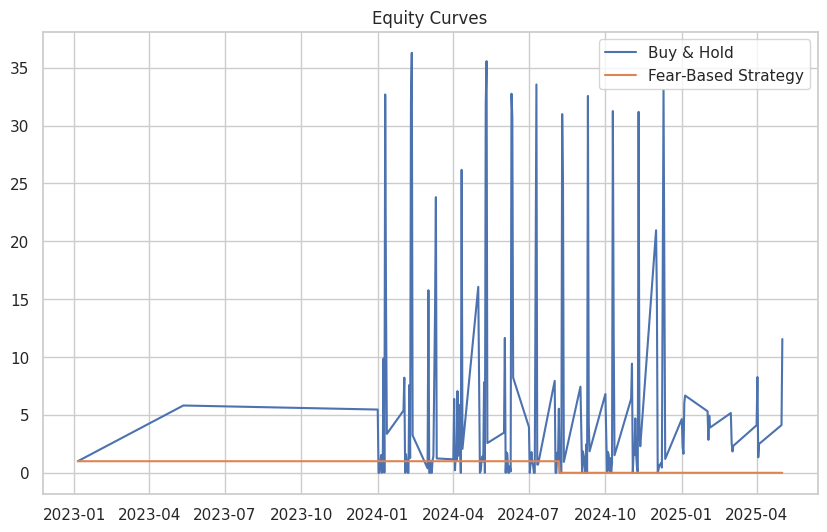

Buy & Hold Return: 1055.14%
Strategy Return:   -100.00%


In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Proxy price & returns
df_price = (
    merged_df
    .groupby('Trade_Date')['Execution Price']
    .mean()
    .reset_index()
    .sort_values('Trade_Date')
)
df_price['market_return'] = df_price['Execution Price'].pct_change()

# Extreme Fear signal (value ≤ 20 → long next day)
sent = (
    merged_df[['Trade_Date','value']]
    .drop_duplicates()
    .sort_values('Trade_Date')
)
sent['signal'] = (sent['value'] <= 20).astype(int)
sent['signal'] = sent['signal'].shift(1).fillna(0)

# Merge & compute strategy
df_bt = pd.merge(df_price, sent[['Trade_Date','signal']], on='Trade_Date', how='left').fillna(0)
df_bt['strategy_return'] = df_bt['signal'] * df_bt['market_return']
df_bt['market_equity']    = (1 + df_bt['market_return']).cumprod()
df_bt['strategy_equity']  = (1 + df_bt['strategy_return']).cumprod()

# Plot & summary
plt.figure(figsize=(10,6))
plt.plot(df_bt['Trade_Date'], df_bt['market_equity'], label='Buy & Hold')
plt.plot(df_bt['Trade_Date'], df_bt['strategy_equity'], label='Fear‐Based Strategy')
plt.legend(); plt.grid(True); plt.title('Equity Curves'); plt.show()

m_ret = df_bt['market_equity'].iloc[-1] - 1
s_ret = df_bt['strategy_equity'].iloc[-1] - 1
print(f"Buy & Hold Return: {m_ret:.2%}")
print(f"Strategy Return:   {s_ret:.2%}")


In [87]:
import pickle
# After trained `pipeline` and have `merged_df`
merged_df.to_csv('merged_trader_sentiment.csv', index=False)
with open('model.pkl','wb') as f:
    pickle.dump(pipeline, f)
